# Stacking!

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Load predictions

In [2]:
DATA_PATH = "../input/ion-switching-train-pred-for-stacking/"
DATA_PATH2 ="../input/simple-eda-model/"
#df_1= pd.read_csv(os.path.join(DATA_PATH, "furth_cat_train_pred_CV0.943.csv"))
df_2= pd.read_csv(os.path.join(DATA_PATH, "lgb_originalsignal_y_pred_rev1_CV0.935_LB0.935.csv"))#11
#df_3= pd.read_csv(os.path.join(DATA_PATH2, "original_ensemble_y_pred.csv")) #12
df_4= pd.read_csv(os.path.join(DATA_PATH, "LightGBM_add_filter_rev8_CV0.939.csv"))
#df_5= pd.read_csv(os.path.join(DATA_PATH, "wavenet_keras_rev3_y_pred_CV0.939_LB0.943.csv"))
df_6= pd.read_csv(os.path.join(DATA_PATH, "wavenet_originaltrain_rev6_y_pred.csv"))
#df_7= pd.read_csv(os.path.join(DATA_PATH, "wavenet_keras_rev4_y_pred_CV0.938.csv"))
df_8= pd.read_csv(os.path.join(DATA_PATH, "lgb_clean_outlier_y_pred_rev12_CV0.942.csv"))
#df_9= pd.read_csv(os.path.join(DATA_PATH, "wavenet_rev2_y_pred_CV0.948_LB0.943.csv"))
#df_10= pd.read_csv(os.path.join(DATA_PATH, "wavenet_rev4_y_pred_CV0.9455_LB0.944.csv"))

In [3]:
train_y = df_2["open_channels"]

In [4]:
DATA_PATH = "../input/first-nn-model-cv-093/"
#df_1_test= pd.read_csv(os.path.join(DATA_PATH, "submission_cat_furth_CV0.943.csv"))
df_2_test= pd.read_csv(os.path.join(DATA_PATH, "submission_original_lgb_CV0.935.csv"))
#df_3_test= pd.read_csv(os.path.join(DATA_PATH2, "submission_original_ensemble.csv"))
df_4_test= pd.read_csv(os.path.join(DATA_PATH, "submission_add_filter_rev8_CV0.939.csv"))
#df_5_test= pd.read_csv(os.path.join(DATA_PATH, "submission_wavenet_keras_rev3CV0.939_LB0.943.csv"))
df_6_test= pd.read_csv(os.path.join(DATA_PATH, "submission_wavenet_rev6_CV0.9441.csv"))
#df_7_test= pd.read_csv(os.path.join(DATA_PATH, "submission_wavenet_keras_rev4_CV0.938.csv"))
df_8_test= pd.read_csv(os.path.join(DATA_PATH, "submission_clean_outlier_rev12_CV0.942.csv"))
#df_9_test= pd.read_csv(os.path.join(DATA_PATH, "submission_wavenet_rev2_CV0.948_LB0.943.csv"))
#df_10_test= pd.read_csv(os.path.join(DATA_PATH, "submission_wavenet_rev4_CV0.9455.csv"))

In [5]:
#train_pred_1=df_1["y_pred"]
train_pred_2=df_2["y_pred"]
#train_pred_3=df_3["y_pred"]
train_pred_4=df_4["y_pred"]
#train_pred_5=df_5["y_pred"]
train_pred_6=df_6["y_pred"]
#train_pred_7=df_7["y_pred"]
train_pred_8=df_8["y_pred"]
#train_pred_9=df_9["y_pred"]
#train_pred_10=df_10["y_pred"]

In [6]:
#test_pred_1=df_1_test["open_channels"]
test_pred_2=df_2_test["open_channels"]
#test_pred_3=df_3_test["open_channels"]
test_pred_4=df_4_test["open_channels"]
#test_pred_5=df_5_test["open_channels"]
test_pred_6=df_6_test["open_channels"]
#test_pred_7=df_7_test["open_channels"]
test_pred_8=df_8_test["open_channels"]
#test_pred_9=df_9_test["open_channels"]
#test_pred_10=df_10_test["open_channels"]

# Validate prediction

In [9]:
#dataset 2
from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4','5','6','7','8','9','10']
report = classification_report(df_2["open_channels"], df_2["y_pred"],target_names=target_names, digits= 4)
print(report)

              precision    recall  f1-score   support

           0     0.9978    0.9967    0.9973   1240152
           1     0.9914    0.9904    0.9909    985865
           2     0.9693    0.9761    0.9727    553924
           3     0.9783    0.9753    0.9768    668609
           4     0.9681    0.9689    0.9685    403410
           5     0.9488    0.9433    0.9460    277877
           6     0.8842    0.8852    0.8847    188112
           7     0.8880    0.8943    0.8911    265015
           8     0.8914    0.8980    0.8947    245183
           9     0.8959    0.8940    0.8950    136120
          10     0.9185    0.8724    0.8949     35733

    accuracy                         0.9670   5000000
   macro avg     0.9392    0.9359    0.9375   5000000
weighted avg     0.9670    0.9670    0.9670   5000000



In [10]:
train_5=df_2[2000000:2500000]
train_10=df_2[4500000:5000000]
from sklearn.metrics import f1_score
print('f1_batch_5', f1_score(train_5["open_channels"], train_5["y_pred"], average = 'macro'))
print('f1_batch_10', f1_score(train_10["open_channels"], train_10["y_pred"], average = 'macro'))
print("Bench mark score:0.84")
print('f1_batch_5_weighted', f1_score(train_5["open_channels"], train_5["y_pred"], average = 'weighted'))
print('f1_batch_10_weighted', f1_score(train_10["open_channels"], train_10["y_pred"], average = 'weighted'))

f1_batch_5 0.7992190407976062
f1_batch_10 0.8674784619735971
Bench mark score:0.84
f1_batch_5_weighted 0.8909906636970145
f1_batch_10_weighted 0.8877069673927478


In [13]:
#dataset 4
from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4','5','6','7','8','9','10']
report = classification_report(df_4["open_channels"], df_4["y_pred"],target_names=target_names, digits= 4)
print(report)

              precision    recall  f1-score   support

           0     0.9981    0.9979    0.9980   1240152
           1     0.9931    0.9921    0.9926    985865
           2     0.9758    0.9775    0.9767    553924
           3     0.9798    0.9802    0.9800    668609
           4     0.9725    0.9701    0.9713    403410
           5     0.9517    0.9447    0.9481    277877
           6     0.8818    0.8908    0.8863    188112
           7     0.8914    0.8919    0.8917    265015
           8     0.8919    0.8992    0.8955    245183
           9     0.8958    0.8965    0.8962    136120
          10     0.9109    0.8840    0.8972     35733

    accuracy                         0.9689   5000000
   macro avg     0.9403    0.9386    0.9394   5000000
weighted avg     0.9689    0.9689    0.9689   5000000



In [14]:
train_5=df_4[2000000:2500000]
train_10=df_4[4500000:5000000]
from sklearn.metrics import f1_score
print('f1_batch_5', f1_score(train_5["open_channels"], train_5["y_pred"], average = 'macro'))
print('f1_batch_10', f1_score(train_10["open_channels"], train_10["y_pred"], average = 'macro'))
print("Bench mark score:0.84")
print('f1_batch_5_weighted', f1_score(train_5["open_channels"], train_5["y_pred"], average = 'weighted'))
print('f1_batch_10_weighted', f1_score(train_10["open_channels"], train_10["y_pred"], average = 'weighted'))

f1_batch_5 0.7977323246901039
f1_batch_10 0.8719627883092125
Bench mark score:0.84
f1_batch_5_weighted 0.8903676111175204
f1_batch_10_weighted 0.8902674853378332


In [17]:
#dataset 6
from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4','5','6','7','8','9','10']
report = classification_report(df_6["open_channels"], df_6["y_pred"],target_names=target_names, digits= 4)
print(report)

              precision    recall  f1-score   support

           0     0.9987    0.9986    0.9986   1240152
           1     0.9947    0.9945    0.9946    985865
           2     0.9818    0.9822    0.9820    553924
           3     0.9846    0.9838    0.9842    668609
           4     0.9758    0.9781    0.9769    403410
           5     0.9558    0.9573    0.9566    277877
           6     0.9088    0.8887    0.8986    188112
           7     0.8981    0.9126    0.9053    265015
           8     0.9082    0.9072    0.9077    245183
           9     0.9080    0.9092    0.9086    136120
          10     0.9190    0.9014    0.9101     35733

    accuracy                         0.9737   5000000
   macro avg     0.9485    0.9467    0.9476   5000000
weighted avg     0.9737    0.9737    0.9737   5000000



In [18]:
train_5=df_6[2000000:2500000]
train_10=df_6[4500000:5000000]
from sklearn.metrics import f1_score
print('f1_batch_5', f1_score(train_5["open_channels"], train_5["y_pred"], average = 'macro'))
print('f1_batch_10', f1_score(train_10["open_channels"], train_10["y_pred"], average = 'macro'))
print("Bench mark score:0.84")
print('f1_batch_5_weighted', f1_score(train_5["open_channels"], train_5["y_pred"], average = 'weighted'))
print('f1_batch_10_weighted', f1_score(train_10["open_channels"], train_10["y_pred"], average = 'weighted'))

f1_batch_5 0.9111894335583238
f1_batch_10 0.8926894539227599
Bench mark score:0.84
f1_batch_5_weighted 0.9035980125545953
f1_batch_10_weighted 0.9043108016163788


In [21]:
#dataset 8
from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4','5','6','7','8','9','10']
report = classification_report(df_8["open_channels"], df_8["y_pred"],target_names=target_names, digits= 4)
print(report)

              precision    recall  f1-score   support

           0     0.9988    0.9980    0.9984   1240152
           1     0.9940    0.9949    0.9945    985865
           2     0.9811    0.9836    0.9823    553924
           3     0.9847    0.9809    0.9828    668609
           4     0.9722    0.9718    0.9720    403410
           5     0.9525    0.9467    0.9496    277877
           6     0.8861    0.8914    0.8888    188112
           7     0.8896    0.8998    0.8947    265015
           8     0.8986    0.8970    0.8978    245183
           9     0.8992    0.9022    0.9007    136120
          10     0.9177    0.8893    0.9033     35733

    accuracy                         0.9710   5000000
   macro avg     0.9431    0.9414    0.9423   5000000
weighted avg     0.9711    0.9710    0.9710   5000000



In [22]:
train_5=df_8[2000000:2500000]
train_10=df_8[4500000:5000000]
from sklearn.metrics import f1_score
print('f1_batch_5', f1_score(train_5["open_channels"], train_5["y_pred"], average = 'macro'))
print('f1_batch_10', f1_score(train_10["open_channels"], train_10["y_pred"], average = 'macro'))
print("Bench mark score:0.84")
print('f1_batch_5_weighted', f1_score(train_5["open_channels"], train_5["y_pred"], average = 'weighted'))
print('f1_batch_10_weighted', f1_score(train_10["open_channels"], train_10["y_pred"], average = 'weighted'))

f1_batch_5 0.8004413814996643
f1_batch_10 0.873040955151408
Bench mark score:0.84
f1_batch_5_weighted 0.893557355433929
f1_batch_10_weighted 0.8930669745885752


## Stacking model

In [27]:
#from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [28]:
# 予測値を特徴量としてデータフレームを作成
#train_x_2 = pd.DataFrame({'pred_1': train_pred_1, 'pred_2': train_pred_2,'pred_3': train_pred_3,'pred_4': train_pred_4,'pred_5': train_pred_5,'pred_6': train_pred_6,'pred_7': train_pred_7,'pred_8': train_pred_8,'pred_9': train_pred_9,'pred_10': train_pred_10})
#test_x_2 = pd.DataFrame({'pred_1': test_pred_1, 'pred_2': test_pred_2,'pred_3': test_pred_3,'pred_4': test_pred_4,'pred_5': test_pred_5,'pred_6': test_pred_6,'pred_7': test_pred_7,'pred_8': test_pred_8,'pred_9': test_pred_9,'pred_10': test_pred_10})
train_x_2 = pd.DataFrame({'pred_2': train_pred_2,'pred_4': train_pred_4,'pred_6': train_pred_6,'pred_8': train_pred_8})
test_x_2 = pd.DataFrame({'pred_2': test_pred_2,'pred_4': test_pred_4,'pred_6': test_pred_6,'pred_8': test_pred_8})

In [29]:
train_x_2.head()

,pred_2,pred_4,pred_6,pred_8
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [30]:
# 2層目
#from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# 学習データに対する「目的変数を知らない」予測値と、テストデータに対する予測値を返す関数
def predict_cv2(model, train_x, train_y, test_x):
    preds = []
    preds_test = []
    va_idxes = []

    kf = KFold(n_splits=4, shuffle=True, random_state=71)

    # クロスバリデーションで学習・予測を行い、予測値とインデックスを保存する
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    # バリデーションデータに対する予測値を連結し、その後元の順序に並べ直す
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    # テストデータに対する予測値の平均をとる
    preds_test = np.mean(preds_test, axis=0)

    return pred_train, preds_test

In [31]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

params = [{'n_components':(1,2,3)}]

pls = PLSRegression()

clf = GridSearchCV(pls, params)
clf.fit(train_x_2, train_y)

#result = clf.cv_results_

#print(result['params'])
#print(result['score'])

GridSearchCV(cv=None, error_score=nan,
             estimator=PLSRegression(copy=True, max_iter=500, n_components=2,
                                     scale=True, tol=1e-06),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_components': (1, 2, 3)}], pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [32]:
result = clf.cv_results_
result
#n_components=2 is the best

{'mean_fit_time': array([0.71820726, 1.10275106, 1.39364629]),
 'std_fit_time': array([0.03616682, 0.03901256, 0.00727342]),
 'mean_score_time': array([0.03780026, 0.04139795, 0.04104242]),
 'std_score_time': array([0.00186284, 0.00108018, 0.00065474]),
 'param_n_components': masked_array(data=[1, 2, 3],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_components': 1}, {'n_components': 2}, {'n_components': 3}],
 'split0_test_score': array([0.99033562, 0.99088706, 0.990899  ]),
 'split1_test_score': array([0.99396457, 0.99444061, 0.99442611]),
 'split2_test_score': array([0.98798069, 0.98840553, 0.98841696]),
 'split3_test_score': array([0.98785392, 0.98800166, 0.98777623]),
 'split4_test_score': array([0.98807831, 0.98847587, 0.98849163]),
 'mean_test_score': array([0.98964262, 0.99004215, 0.99000199]),
 'std_test_score': array([0.00234811, 0.00242304, 0.00245459]),
 'rank_test_score': array([3, 1, 2], dtype=int32)}

In [33]:
# 2層目のモデル(PLS回帰)
#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import Ridge
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
class Model2Linear:

    def __init__(self):
        self.model = None
        self.scaler = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.scaler = StandardScaler()
        self.scaler.fit(tr_x)
        tr_x = self.scaler.transform(tr_x)
        self.model = PLSRegression(n_components=2)
        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        x = self.scaler.transform(x)
        pred = self.model.predict(x)
        return pred

In [34]:
# pred_train_2は、2層目のモデルの学習データのクロスバリデーションでの予測値
# pred_test_2は、2層目のモデルのテストデータの予測値
model_2 = Model2Linear()
pred_train_2, pred_test_2 = predict_cv2(model_2, train_x_2, train_y, test_x_2)

In [35]:
def pred_proc(pred):
    pred = np.round(np.clip(pred, 0, 10))
    return pred.astype(int)

In [36]:
pred_train_2_=pred_proc(pred_train_2)
print(f1_score(train_y, pred_train_2_, average='macro'))

0.9475655433554901


In [37]:
#pred_test_2_ = pred_proc(pred_test_2)
#DATA_PATH2 = "../input/liverpool-ion-switching"
#submission_df2 = pd.read_csv(os.path.join(DATA_PATH2, 'sample_submission.csv'))
#submission_df2['open_channels'] = pred_test_2_
#submission_df2.to_csv('submission_original_pls.csv', index=False, float_format='%.4f')

# Optimize Rounder

In [38]:
#ref:https://www.kaggle.com/artgor/eda-and-model-f1-optimization
import numpy as np
import scipy as sp
from functools import partial
from sklearn import metrics

class OptimizedRounderF1(object):
    """
    An optimizer for rounding thresholds
    to maximize f1 score
    """
    def __init__(self):
        self.coef_ = 0

    def _f1_loss(self, coef, X, y):
        """
        Get loss according to
        using current coefficients
        
        :param coef: A list of coefficients that will be used for rounding
        :param X: The raw predictions
        :param y: The ground truth labels
        """
        X_p = pd.cut(X, [-np.inf] + list(np.sort(coef)) + [np.inf], labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

        return -metrics.f1_score(y, X_p, average='macro')

    def fit(self, X, y):
        """
        Optimize rounding thresholds
        
        :param X: The raw predictions
        :param y: The ground truth labels
        """
        loss_partial = partial(self._f1_loss, X=X, y=y)
        initial_coef = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
        self.coef_ = sp.optimize.minimize(loss_partial, initial_coef, method='nelder-mead')

    def predict(self, X, coef):
        """
        Make predictions with specified thresholds
        
        :param X: The raw predictions
        :param coef: A list of coefficients that will be used for rounding
        """
        return pd.cut(X, [-np.inf] + list(np.sort(coef)) + [np.inf], labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


    def coefficients(self):
        """
        Return the optimized coefficients
        """
        return self.coef_['x']

In [39]:
optR = OptimizedRounderF1()
optR.fit(pred_train_2.reshape(-1,), train_y)
coefficients=optR.coefficients()
print(coefficients)

[0.50625 1.51875 2.5     3.5     4.5     5.5     6.5     7.5     8.5
 9.5    ]


In [40]:
opt_pred = optR.predict(pred_train_2.reshape(-1,), coefficients)
print('f1', metrics.f1_score(train_y, opt_pred, average = 'macro'))

f1 0.9475662025380109


In [41]:
DATA_PATH2 = "../input/liverpool-ion-switching"
train = pd.read_csv(os.path.join(DATA_PATH2, 'train.csv'))
train['y_pred'] = opt_pred
train.to_csv('pls_stacking3_y_pred.csv', index=False, float_format='%.4f')


In [42]:
from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4','5','6','7','8','9','10']
report = classification_report(train_y, opt_pred,target_names=target_names, digits= 4)
print(report)

              precision    recall  f1-score   support

           0     0.9987    0.9985    0.9986   1240152
           1     0.9947    0.9945    0.9946    985865
           2     0.9817    0.9822    0.9820    553924
           3     0.9846    0.9838    0.9842    668609
           4     0.9758    0.9781    0.9770    403410
           5     0.9558    0.9573    0.9566    277877
           6     0.9088    0.8887    0.8986    188112
           7     0.8981    0.9126    0.9053    265015
           8     0.9082    0.9072    0.9077    245183
           9     0.9080    0.9092    0.9086    136120
          10     0.9190    0.9014    0.9101     35733

    accuracy                         0.9737   5000000
   macro avg     0.9485    0.9467    0.9476   5000000
weighted avg     0.9737    0.9737    0.9737   5000000



In [43]:
#final_pred=pred_proc(pred_test_2)
final_pred=optR.predict(pred_test_2.reshape(-1,), coefficients)

In [44]:
DATA_PATH2 = "../input/liverpool-ion-switching"
submission_df = pd.read_csv(os.path.join(DATA_PATH2, 'sample_submission.csv'))
submission_df['open_channels'] = final_pred
submission_df.to_csv('submission_pls_stacking3.csv', index=False, float_format='%.4f')

# Appendix "Check relation of each predictions"

In [45]:
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns

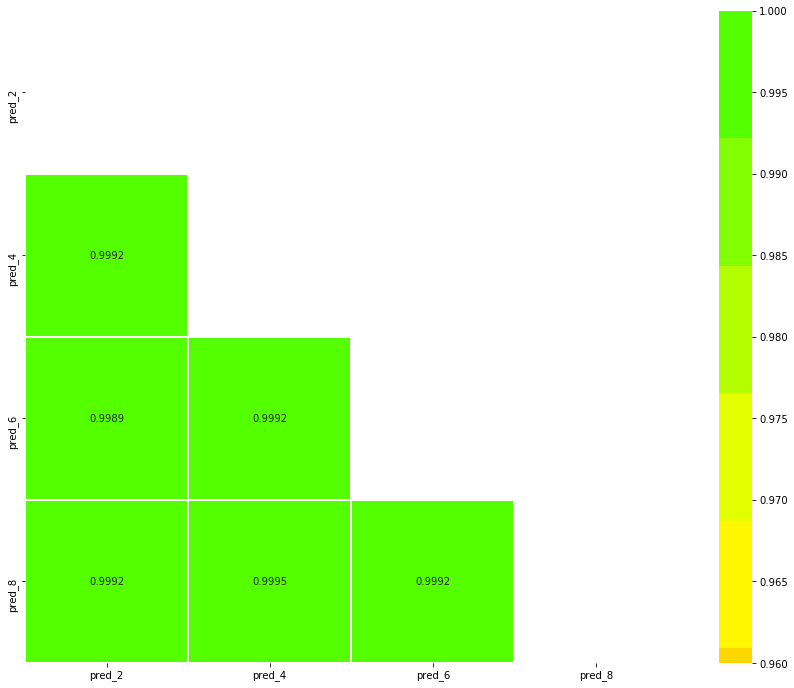

In [46]:
corr = train_x_2.iloc[:,0:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='prism', vmin=0.96, center=0, square=True, linewidths=1, annot=True, fmt='.4f')